In [1]:
import dask

In [3]:
from dask import delayed

In [48]:
@delayed
def preprocess_downsample(dataframe):
    return dataframe

In [47]:
@delayed
def concat_str_values(dataframe):
    return dataframe

In [46]:
@delayed
def tokenize_n_rem_stopwords(dataframe, stop_words):
    return dataframe

In [45]:
@delayed
def build_index(dataframe):
    return dict

In [44]:
@delayed
def sample_pairs(dataframe, n):
    return dataframe

In [43]:
@delayed
def probe_index(index, dataframe):
    return dataframe

In [42]:
@delayed
def postprocess_downsample(df1, df2):
    return [df1, df2]

In [36]:
def down_sample(A, B, size, y_param):

    temp = (delayed)(concat_str_values)(A)
    str_vals1 = (delayed)(preprocess_downsample)(temp)
    toks1 = (delayed)(tokenize_n_rem_stopwords)(str_vals1, [])
    index = (delayed)(build_index)(toks1)
    
    B1 = (delayed)(sample_pairs)(B, 10)    
    str_vals2 = (delayed)(concat_str_values)(B1)    
    toks2 = (delayed)(tokenize_n_rem_stopwords)(str_vals2, [])
    sample_a_indices = (delayed)(probe_index)(index, toks2)
    
    result = (delayed)(postprocess_downsample)(sample_a_indices, B1)
    return result
    
    
    

In [49]:
def down_sample_1(A, B, size, y_param):

    temp = concat_str_values(A)
    str_vals1 = preprocess_downsample(temp)
    toks1 = tokenize_n_rem_stopwords(str_vals1, [])
    index = build_index(toks1)
    
    B1 = sample_pairs(B, 10)    
    str_vals2 = concat_str_values(B1)    
    toks2 = tokenize_n_rem_stopwords(str_vals2, [])
    sample_a_indices = probe_index(index, toks2)
    
    result = postprocess_downsample(sample_a_indices, B1)
    return result


In [30]:
import py_stringsimjoin as ssj

In [31]:
A, B = ssj.load_person_dataset()

In [50]:
res = (down_sample_1)(A, B, 100, 2)

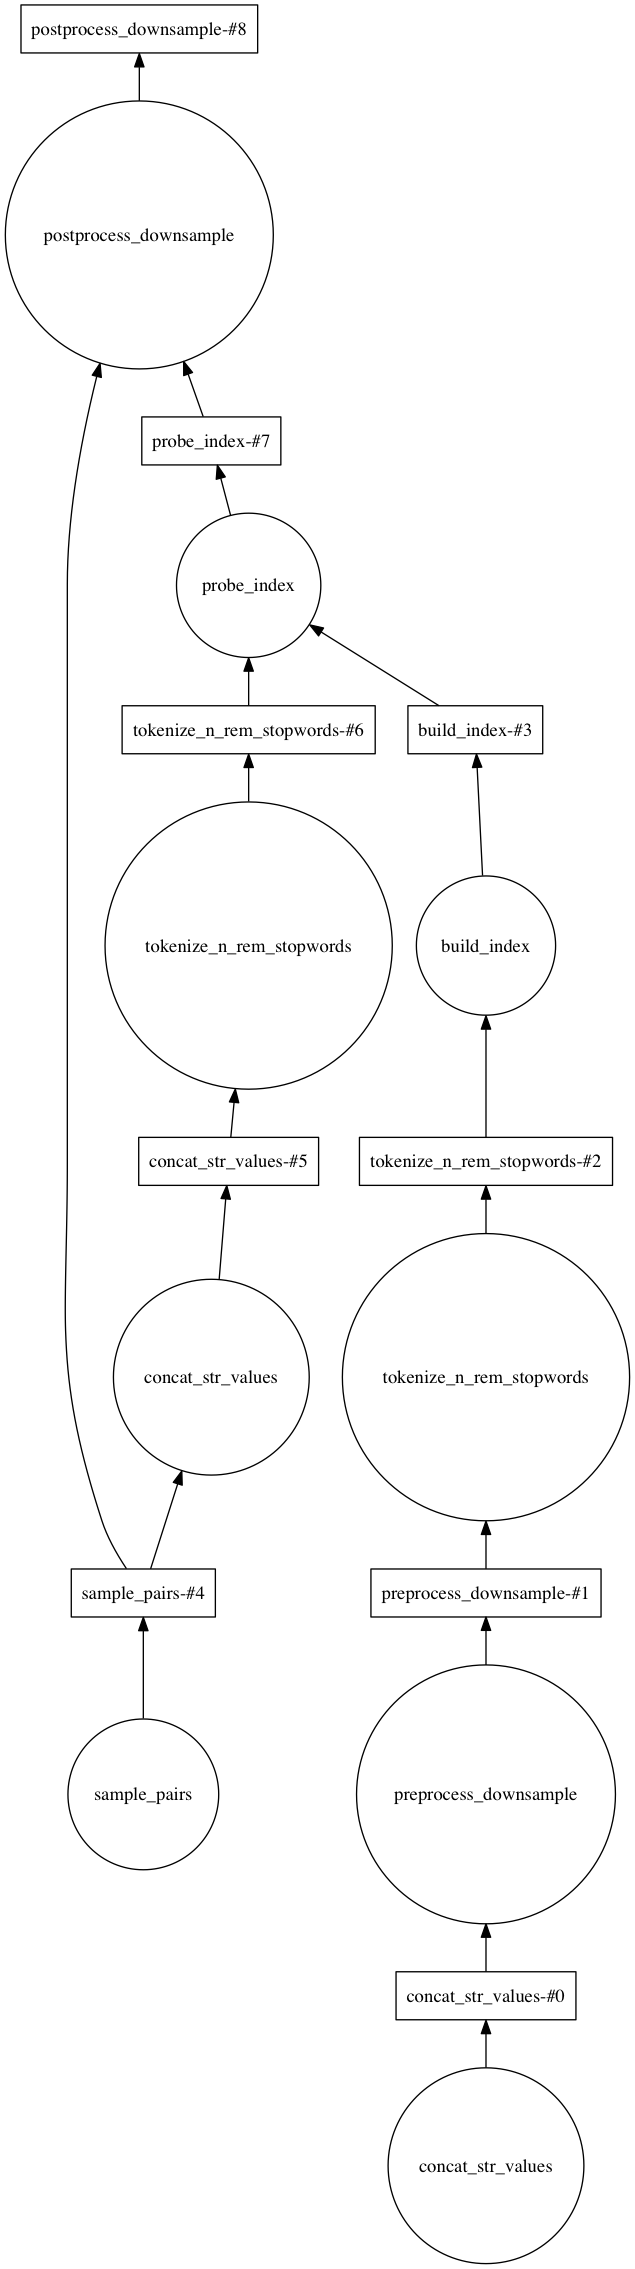

In [51]:
res.visualize()

In [53]:
import numpy as np

In [54]:
c = np.array(['a1b2','1b2a','b2a1','2a1b'],'S4'); c

array([b'a1b2', b'1b2a', b'b2a1', b'2a1b'], 
      dtype='|S4')

In [56]:
import sys

In [57]:
sys.getsizeof(c)

112

In [58]:
x = ['a1b2','1b2a','b2a1','2a1b']

In [59]:
sys.getsizeof(x)

96

In [62]:
import cython

In [65]:
%load_ext Cython

In [67]:
%%cython
cdef fn():
    print('Hello')

In [72]:
%%cython
from libcpp.pair cimport pair
from libcpp.vector cimport vector 
def temp():

    cdef vector[pair[int, int]] sample 
    return sample

CompileError: command 'gcc' failed with exit status 1